#Resources

https://docs.google.com/forms/d/17vTnSoed2zY-c6tjf-Jm8fj6nxAh32fdEu8ZXhI5RtI/edit#responses
https://docs.google.com/document/d/1AkcGxCVBW5Qiz976PxR2uqbDkzoFgt8u21q739d4CcE/edit

#  Data process

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

In [ ]:
filepath1 ="/content/df_sorted.csv"

In [ ]:
df=pd.read_csv(filepath1)

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
column_name = ['Gender',
               '[Books, Magazine and Stationary]',
               '[Event Tickets]',
               '[Cosmetics and personal care products]',
               '[Technological Products]',
               '[Banking Services]',
               '[Souvenirs and Ornaments]',
               '[Travel Tickets]',
               '[Home Appliances]',
               '[Sports Equipment]',
               '[Film, music CD/DVD]'
               ]

In [ ]:
df.columns =column_name

In [ ]:
df = df.sort_values(by=column_name)

In [ ]:
df

In [ ]:
df.to_csv('df_sorted.csv', index=False)

In [ ]:
df.info()

In [ ]:
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

In [ ]:
df['Gender'].value_counts()

In [ ]:
#indices_to_drop = df[(df['Gender'] == 'Bisexual') | (df['Gender'] == 'Lesbian')].index
#df = df.drop(indices_to_drop)

In [ ]:
category_mapping = {
    'Female': 0,
    'Male': 1,
    'Bisexual': 2,
    'Lesbian': 2
}

# Replace values in the 'Gender' column with numerical values
df['Gender'] = df['Gender'].replace(category_mapping)

In [ ]:
# Assuming your dataframe is named 'df' and the gender column is 'gender'
# Count the number of entries for each gender
gender_counts = df['Gender'].value_counts()

# Identify the gender with more entries
more_entries_gender = gender_counts.idxmax()

# Find the difference in counts between the two genders
difference = gender_counts.max() - gender_counts.min()

# Get the indices of the excess entries of the gender with more counts
excess_indices = df[df['Gender'] == more_entries_gender].sample(n=difference).index

# Drop the excess entries from the dataframe
df = df.drop(excess_indices)

In [ ]:
df['Gender'].value_counts()

In [ ]:
#indices_to_drop = df[(df['Gender'] == 2) | (df['Gender'] == 3)].index
#df = df.drop(indices_to_drop)

In [ ]:
y = pd.DataFrame(df['Gender'])

In [ ]:
X = df.drop(df.columns[0], axis=1)

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit



stratified_split = StratifiedShuffleSplit(n_splits=4, test_size=18, random_state=42)

for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [ ]:
y_train

In [ ]:
X_test

In [ ]:
# Splitting the data into 80% training and 20% test sets with stratification
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X.columns
scaler = MinMaxScaler()
scaler.fit(X[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train
X_test
y_train
y_test

In [ ]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:

# Count occurrences of unique values
unique_values, counts = np.unique(y_test, return_counts=True)

# Display unique values and their respective counts
for value, count in zip(unique_values, counts):
    print(f"Value {value} occurs {count} times")

In [ ]:
y_train.shape

In [ ]:
y_test

In [ ]:
X.columns

In [ ]:
df_y_train = pd.DataFrame(y_train)

# Save DataFrame to a CSV file
df_y_train.to_csv('df_y_train.csv', index=False)

df_y_test = pd.DataFrame(y_test)

# Save DataFrame to a CSV file
df_y_test.to_csv('df_y_test.csv', index=False)


df_X_train = pd.DataFrame(X_train)

# Save DataFrame to a CSV file
df_X_train.to_csv('df_X_train.csv', index=False)

df_X_test = pd.DataFrame(X_test)

# Save DataFrame to a CSV file
df_X_test.to_csv('df_X_test.csv', index=False)

# other dataset

In [ ]:
filepath1 = "/content/drive/MyDrive/data sci 2 file/mountedFiles/RTML with Insulin.csv"

In [ ]:
df=pd.read_csv(filepath1)


In [ ]:

df = df.drop(df.columns[0], axis=1)

In [ ]:
seventh_column = df.iloc[:, 6]

In [ ]:
value_counts = df['Outcome'].value_counts()

In [ ]:
y = pd.DataFrame(seventh_column)

In [ ]:
X = df.drop(df.columns[6], axis=1)


In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit



stratified_split = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X.columns
scaler = MinMaxScaler()
scaler.fit(X[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
X_train

In [ ]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [ ]:
X_test

In [ ]:
y_test

# roc curves

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a classifier (Logistic Regression as an example)
classifier = LogisticRegression(multi_class='ovr')  # One-vs-Rest strategy
classifier.fit(X_train, y_train)

# Obtain predicted probabilities for each class
probas = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_classifier.fit(X_train, y_train)

# Obtain predicted probabilities for each class
probas = knn_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (KNN)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)  # Using SVM with probability estimates
svm_classifier.fit(X_train, y_train)

# Obtain predicted probabilities for each class
probas = svm_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (SVM)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)  # Using SVM with probability estimates
svm_classifier.fit(X_train, y_train)

# Obtain predicted probabilities for each class
probas = svm_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(np.unique(y_test)))]))

# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(np.unique(y_test))):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= len(np.unique(y_test))

# Compute AUC
roc_auc = auc(all_fpr, mean_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (SVM)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X, y

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)
X, y

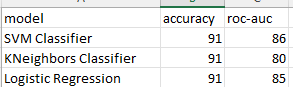

#loading data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
X_train ="/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_X_train.csv"
X_test = "/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_X_test.csv"
y_train ="/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_y_train.csv"
y_test ="/content/drive/MyDrive/data sci 2 file/mountedFiles/final project/df_y_test.csv"

In [ ]:
X_train = pd.read_csv(X_train)
X_train = X_train.values

In [ ]:
X_test = pd.read_csv(X_test)
X_test = X_test.values
y_train = pd.read_csv(y_train)
y_train = y_train.values.ravel()
y_test = pd.read_csv(y_test)
y_test = y_test.values.ravel()

In [ ]:
X_test

array([[0.33333333, 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.42857143, 0.66666667, 0.5       , 0.28571429],
       [1.        , 0.42857143, 1.        , 0.66666667, 0.57142857,
        1.        , 0.42857143, 1.        , 1.        , 0.71428571],
       [1.        , 0.28571429, 0.66666667, 0.66666667, 0.85714286,
        0.83333333, 1.        , 0.5       , 0.66666667, 0.57142857],
       [0.        , 0.        , 0.16666667, 0.16666667, 0.        ,
        0.        , 0.        , 0.16666667, 0.16666667, 0.14285714],
       [0.5       , 0.42857143, 0.66666667, 0.66666667, 0.28571429,
        0.5       , 0.57142857, 0.5       , 0.5       , 0.14285714],
       [0.        , 0.        , 0.66666667, 0.5       , 0.14285714,
        0.16666667, 0.28571429, 0.16666667, 0.        , 0.42857143],
       [0.33333333, 0.28571429, 0.16666667, 0.83333333, 0.14285714,
        0.16666667, 0.28571429, 0.        , 0.66666667, 0.28571429],
       [0.33333333, 0.85714286, 0.6666666

In [ ]:
y_test

array([1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2])

# code with grid serach

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001
[CV 1/5; 1/288] END C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001;, score=0.333 total time=   0.0s
[CV 2/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001
[CV 2/5; 1/288] END C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001;, score=0.333 total time=   0.0s
[CV 3/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001
[CV 3/5; 1/288] END C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=42, solver=liblinear, tol=0.0001;, score=0.357 total time=   0.0s
[CV 4/5; 1/288] START C=0.001, class_weight=None, multi_class=ovr, penalty=l1, random_state=4

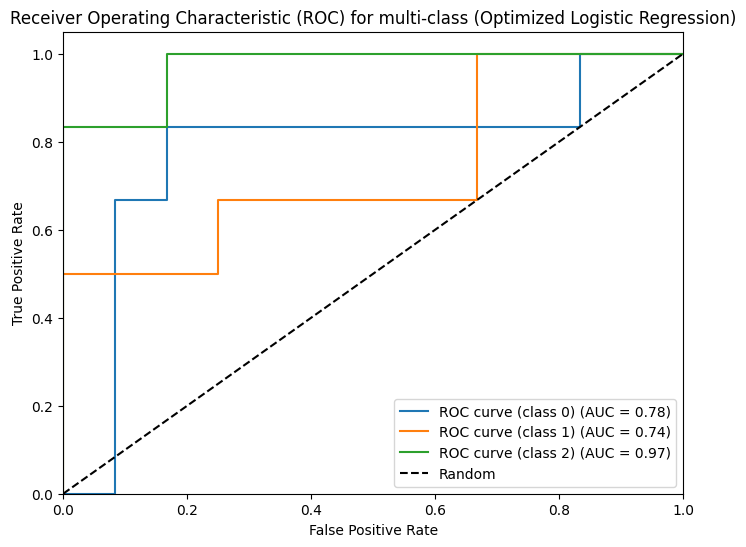

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42],  # Example random state value
    'multi_class': ['ovr', 'multinomial'],
}
"""
# lower parameters for testing only
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],

}
"""
# Instantiate Logistic Regression classifier
log_classifier = LogisticRegression()

# Instantiate GridSearchCV
grid_search = GridSearchCV(log_classifier, param_grid, cv=5, scoring='accuracy', verbose=10)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_log_classifier = grid_search.best_estimator_

# show best parameters
print("Best Parameters:", best_params)

# Use the best model to predict
probas = best_log_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_log_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_log_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_log_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
y_test

array([1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2])

In [ ]:
y_pred

array([0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2])

[[16  2  6]
 [ 6 15  3]
 [ 3  1 20]]
Accuracy Score: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.83      0.62      0.71        24
           2       0.69      0.83      0.75        24

    accuracy                           0.71        72
   macro avg       0.72      0.71      0.71        72
weighted avg       0.72      0.71      0.71        72



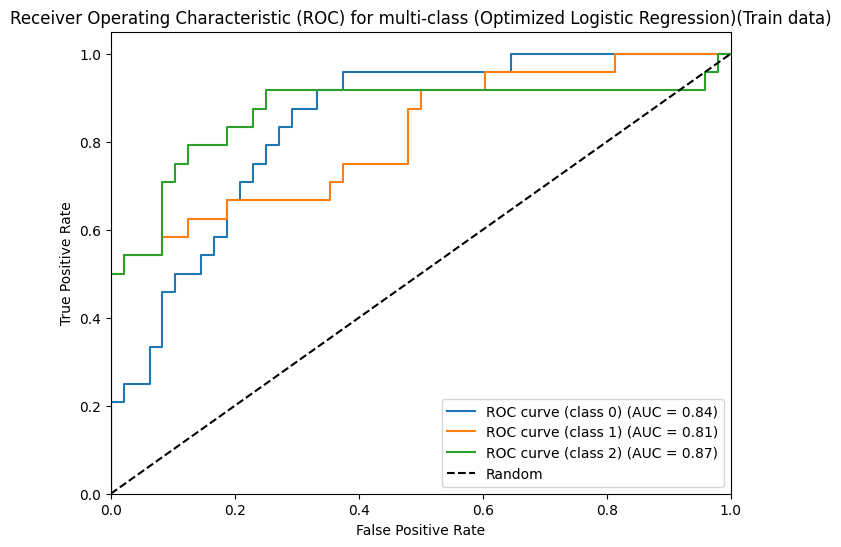

In [ ]:
# Use the best model to predict
probas = best_log_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_log_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_log_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_log_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized Logistic Regression)(Train data)')
plt.legend(loc='lower right')
plt.show()

Streaming output truncated to the last 5000 lines.
[CV 3/5; 270/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 4/5; 270/768] START algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance
[CV 4/5; 270/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.429 total time=   0.0s
[CV 5/5; 270/768] START algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance
[CV 5/5; 270/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 1/5; 271/768] START algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform
[CV 1/5; 271/768] END algorithm=ball_tree, leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.467 total time=   0.0s
[CV 2/5; 271/768] START algor

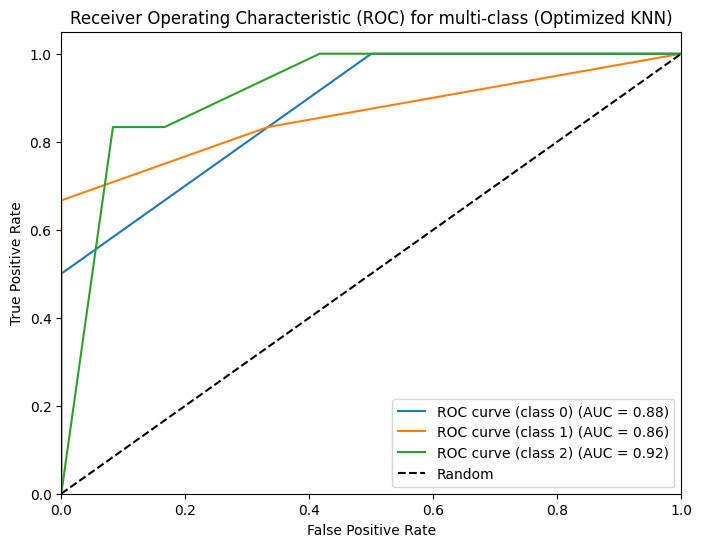

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for number of neighbors
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Different distance metrics
}
"""
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for number of neighbors
    'weights': ['uniform', 'distance'],
}
"""

# Instantiate K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=10)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# show best parameters
print("Best Parameters:", best_params)

# Use the best model to predict
probas = best_knn_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i],tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_knn_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized KNN)')
plt.legend(loc='lower right')
plt.show()


[[21  1  2]
 [ 5 16  3]
 [ 1  0 23]]
Accuracy Score: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.94      0.67      0.78        24
           2       0.82      0.96      0.88        24

    accuracy                           0.83        72
   macro avg       0.85      0.83      0.83        72
weighted avg       0.85      0.83      0.83        72



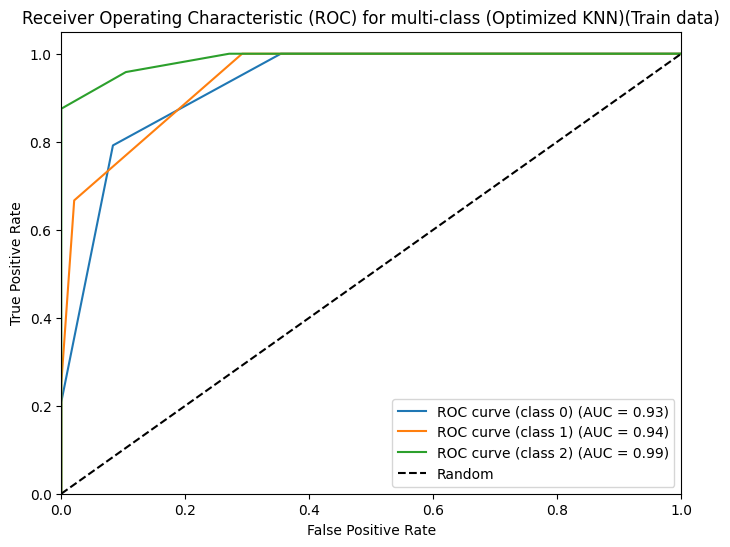

In [ ]:
# Use the best model to predict
probas = best_knn_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_knn_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_knn_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_knn_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized KNN)(Train data)')
plt.legend(loc='lower right')
plt.show()

Streaming output truncated to the last 5000 lines.
[CV 3/5; 798/1296] END C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False;, score=0.571 total time=   0.0s
[CV 4/5; 798/1296] START C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False
[CV 4/5; 798/1296] END C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False;, score=0.571 total time=   0.0s
[CV 5/5; 798/1296] START C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False
[CV 5/5; 798/1296] END C=1, break_ties=False, coef0=0.5, decision_function_shape=ovr, degree=2, gamma=scale, kernel=poly, probability=True, shrinking=False;, score=0.643 total time=   0.0s
[CV 1/5; 799/1296] START C=1, break_ties=False, coef0=0.5, decisio

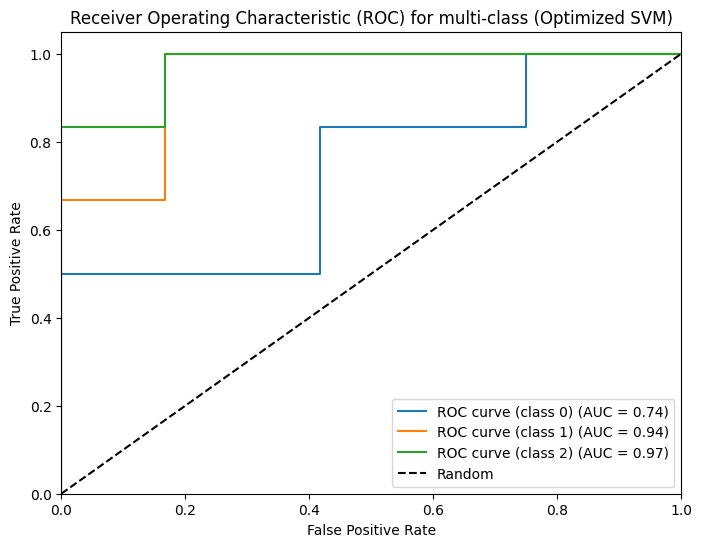

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Generate synthetic multi-class data
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],  # Polynomial degree for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5],  # Independent term in 'poly' and 'sigmoid' kernels
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'probability': [True],  # Whether to enable probability estimates
    'decision_function_shape': ['ovr', 'ovo'],  # Decision function shape for multi-class
    'break_ties': [True, False]  # Whether to break ties in 'ovr' mode
}

# Instantiate Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=10)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# show best parameters
print("Best Parameters:", best_params)

# Use the best model to predict
probas = best_svm_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_svm_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized SVM)')
plt.legend(loc='lower right')
plt.show()


[[19  4  1]
 [ 3 20  1]
 [ 1  0 23]]
Accuracy Score: 0.8611111111111112
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.83      0.83      0.83        24
           2       0.92      0.96      0.94        24

    accuracy                           0.86        72
   macro avg       0.86      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72



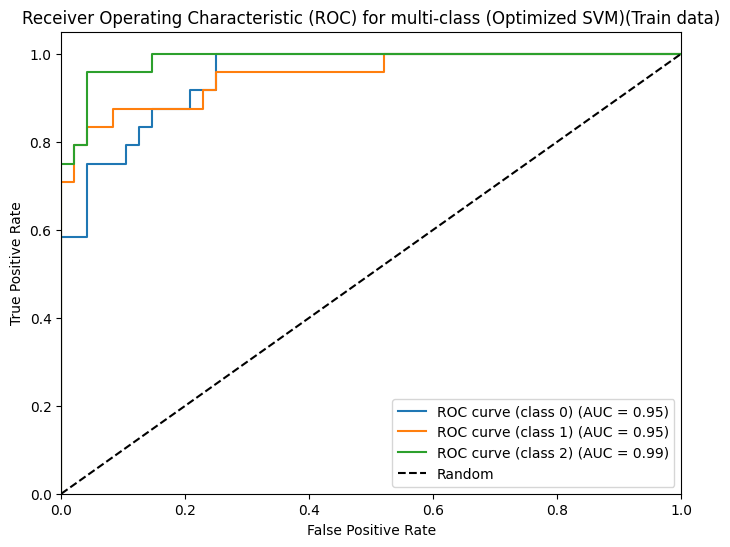

In [ ]:
# Use the best model to predict
probas = best_svm_classifier.predict_proba(X_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_svm_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_train == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(best_svm_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = best_svm_classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_train, y_pred)))
print(classification_report(y_train, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Optimized SVM)(Train data)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred

In [ ]:
y_test

# ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

# Assuming you have best_svm_classifier, best_knn_classifier, and best_log_classifier

# Create a VotingClassifier with the best classifiers
ensemble_classifier = VotingClassifier(
    estimators=[
        ('svm', best_svm_classifier),
        ('knn', best_knn_classifier),
        ('logistic', best_log_classifier)
    ],
    voting='soft'  # Use 'soft' voting for probabilities
)

# Fit the ensemble classifier to the training data
ensemble_classifier.fit(X_train, y_train)

# Use the ensemble to predict probabilities on the test data
probas = ensemble_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

# Additional evaluation metrics
y_pred = ensemble_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Plotting settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for multi-class (Ensemble)')
plt.legend(loc='lower right')
plt.show()
